# Problema 4

In [5]:
from pylab import * # esto carga numpy y pyplot
%run integradores.ipynb
%matplotlib inline

Tengo el sistema de ecuaciones dado en el problema programado debajo en la funcion _sistema_

In [6]:
def sistema(x,t):
    x,y,z = x[0:3]
    x_dot = 10*(y-x)
    y_dot = x*(28-z)-y
    z_dot = x*y-8.0*z/3
    return array([x_dot,y_dot,z_dot])

## (a)

Usarmos la biblioteca _random_ de numpy para generar condiciones iniciales aletorias dentro del rango especificado.

In [13]:
inicial = uniform(-5.0,+5.0,size=(3,))
dominio = [0,30] # rango para t
print("¡Condiciones iniciales aletorias!\n(x, y, z) = {}".format(inicial))

¡Condiciones iniciales aletorias!
(x, y, z) = [ 3.63899557 -2.1301636   2.65316831]


Ahora, usaré el método de Runge-Kutta de cuarto orden para integrar la solución

In [14]:
t,sol = int_rk4(sistema,inicial,dominio,h=0.01)

Por último, voy a graficar la solucion en los distintos planos: $XY$, $XZ$, $YZ$.

El punto abierto es $t=0$ y el punto relleno es el punto final de la solución. En el título incluyo la condición inicial.

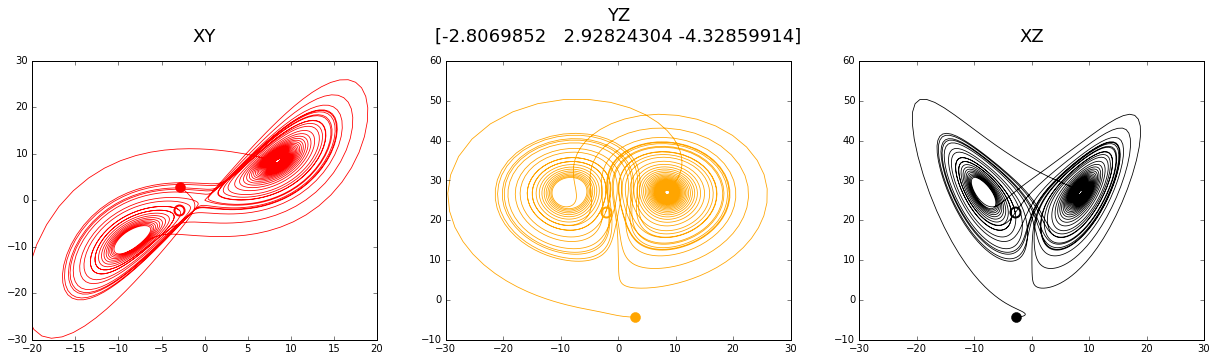

In [69]:
fig = figure(figsize=(21,5))

aXY = fig.add_subplot(1,3,1)  
t = "XY"
aXY.set_title(t, fontsize=18, y=1.05)
aXY.plot(sol[:,0],sol[:,1],color="red",lw=0.8)
aXY.plot(sol[0,0],sol[0,1],
         ".",markersize=20,color="red")
aXY.plot(sol[-1,0],sol[-1,1],
     ".",markersize=20,color="red",markerfacecolor="None",markeredgewidth=2)    
aXY.set_xlim(-20,20); aXY.set_ylim(-30,+30);

aYZ = fig.add_subplot(1,3,2)    
t = "YZ\n{}".format(inicial)
aYZ.set_title(t, fontsize=18, y=1.05)    
aYZ.plot(sol[:,1],sol[:,2],color="orange",lw=0.8)
aYZ.plot(sol[0,1],sol[0,2],
         ".",markersize=20,color="orange")
aYZ.plot(sol[-1,1],sol[-1,2],
     ".",markersize=20,color="orange",markerfacecolor="None",markeredgewidth=2)
aYZ.set_xlim(-30,30); aYZ.set_ylim(-10,60);

aXZ = fig.add_subplot(1,3,3)
t = "XZ"
aXZ.set_title(t, fontsize=18, y=1.05)    
aXZ.plot(sol[:,0],sol[:,2],color="black",lw=0.8)
aXZ.plot(sol[+0,0],sol[+0,2],
         ".",markersize=20,color="black")
aXZ.plot(sol[-1,0],sol[-1,2],
         ".",markersize=20,color="black",markerfacecolor="None",markeredgewidth=2)
aXZ.set_xlim(-30,30); aXZ.set_ylim(-10,60);

Podemos observar que hay un comportamiento muy curioso de atracción alrededor de dos puntos, dando una oŕobita complicada que viene y va entre estos dos puntos.

Investigando un poco, a partir de la forma que tiene el sistema de ecuaciones podemos establecer que esto es un caso partícular del _atractor de Lorenz_. Qué casualidad.

## (b)

Tomaré tres condiciones iniciales de la siguiente forma:  
1. Generar tres condiciones iniciales aleatorias
2. Tomar la coordenada $y$ de una, $y_{0}$
3. Reasignar las coordenadas $y$ de las otras dos condiciones con $y_{0}\pm0.01$

También incrementaré ligeramente el domino para $t$

In [37]:
iniciales = uniform(-5.0,+5.0,size=(3,3))
iniciales[0,1],iniciales[2,1] = iniciales[1,1]+0.01,iniciales[1,1]-0.01
dominio = [0,50] # rango para t
print("¡Condiciones iniciales pseudo-aletorias!\n(x, y, z) = {}\n(x, y, z) = {}\n(x, y, z) = {}".format(*iniciales))

¡Condiciones iniciales pseudo-aletorias!
(x, y, z) = [-1.96243079  2.94824304  0.90911219]
(x, y, z) = [-4.212415    2.93824304 -0.62100175]
(x, y, z) = [-2.8069852   2.92824304 -4.32859914]


Para las gráficas, seguiré la misma convención que en el inciso $(a)$.

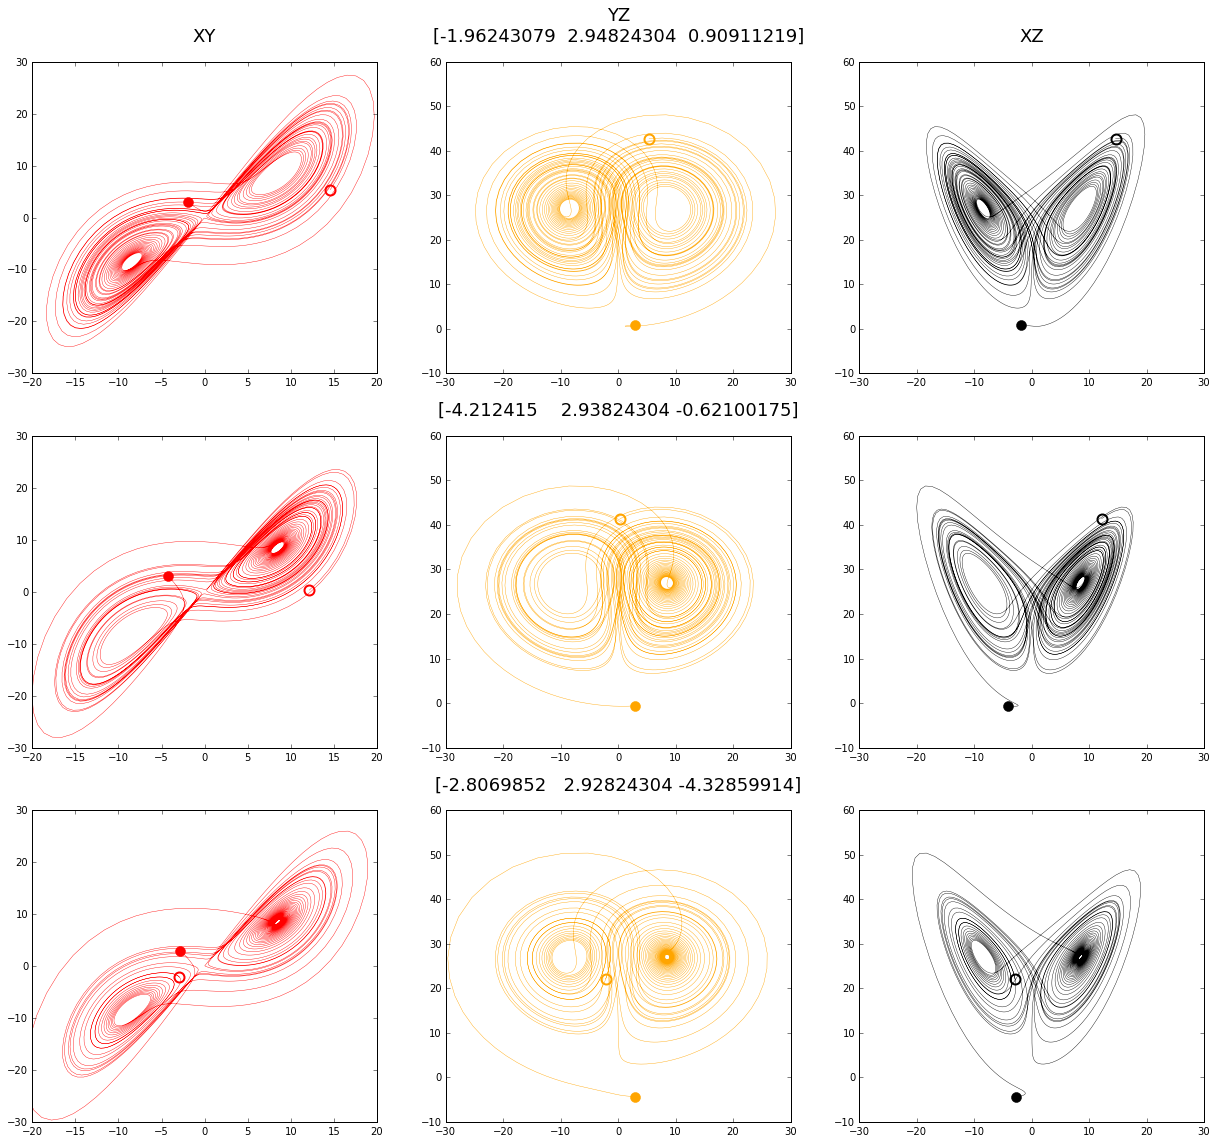

In [65]:
fig = figure(figsize=(21,19))

for i in xrange(iniciales.shape[0]):
    inicial = iniciales[i]
    t,sol = int_rk4(sistema,inicial,dominio,h=0.01)
    
    aXY = fig.add_subplot(3,3,i*3+1)
    t = "XY" if i==0 else ""
    aXY.set_title(t, fontsize=18, y=1.05)
    aXY.plot(sol[:,0],sol[:,1],color="red",lw=0.4)
    aXY.plot(sol[0,0],sol[0,1],
             ".",markersize=20,color="red")
    aXY.plot(sol[-1,0],sol[-1,1],
         ".",markersize=20,color="red",markerfacecolor="None",markeredgewidth=2)    
    aXY.set_xlim(-20,20); aXY.set_ylim(-30,+30);
    
    aYZ = fig.add_subplot(3,3,i*3+2)    
    t = "YZ\n{}".format(inicial) if i==0 else "{}".format(inicial)
    aYZ.set_title(t, fontsize=18, y=1.05)    
    aYZ.plot(sol[:,1],sol[:,2],color="orange",lw=0.4)
    aYZ.plot(sol[0,1],sol[0,2],
             ".",markersize=20,color="orange")
    aYZ.plot(sol[-1,1],sol[-1,2],
         ".",markersize=20,color="orange",markerfacecolor="None",markeredgewidth=2)
    aYZ.set_xlim(-30,30); aYZ.set_ylim(-10,60);

    aXZ = fig.add_subplot(3,3,i*3+3)
    t = "XZ" if i==0 else ""
    aXZ.set_title(t, fontsize=18, y=1.05)    
    aXZ.plot(sol[:,0],sol[:,2],color="black",lw=0.4)
    aXZ.plot(sol[+0,0],sol[+0,2],
             ".",markersize=20,color="black")
    aXZ.plot(sol[-1,0],sol[-1,2],
             ".",markersize=20,color="black",markerfacecolor="None",markeredgewidth=2)
    aXZ.set_xlim(-30,30); aXZ.set_ylim(-10,60);

De nuevo, podemos notar que todas las soluciones exhiben el mismo comportamiento de ser atraídas hacía órbitas extremadamente parecidas. Aun así, colocando las condiciones iniciales cercanas las unas a las otras no garantiza que las soluciones se parezcan (al menos cualtiativamente); con una observación mas cercana, vemos que las trayectorias que se siguieron en los distintos casos son bastantes distintas. Hacer una animación comparativa dejaría mas patente las diferencias en la evolución temporal.

A pesar de este comportamiento caótico, podemos notar que hay una correlación entre la posición en $y$ y la cercanía al atractor ''de la derecha''; pero esto podría ser una patrón espurio...